Epoch 1/30
469/469 [==============================] - 8s 13ms/step - loss: 1.5709 - accuracy: 0.7730 - val_loss: 1.1801 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 1.0327 - accuracy: 0.8268 - val_loss: 0.9102 - val_accuracy: 0.8129 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.7981 - accuracy: 0.8359 - val_loss: 0.7927 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.6903 - accuracy: 0.8350 - val_loss: 0.6402 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.6290 - accuracy: 0.8377 - val_loss: 0.6236 - val_accuracy: 0.8296 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.5907 - accuracy: 0.8415 - val_loss: 0.6277 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 5s 12ms/st

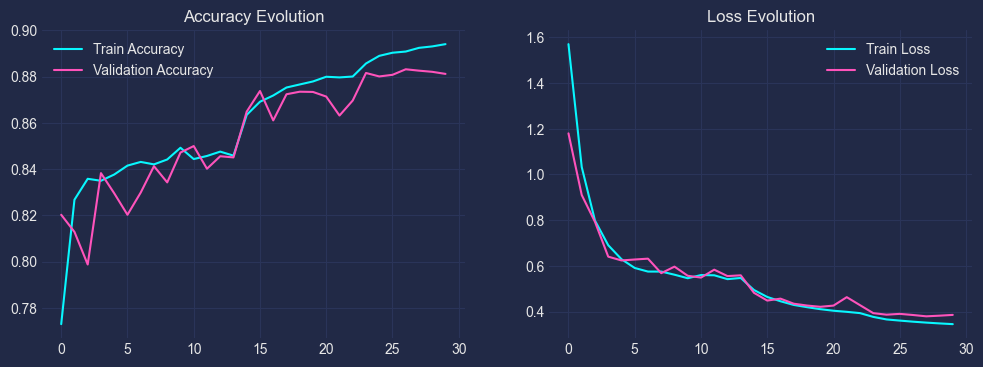

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28*28).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28*28).astype('float32') / 255.0

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3, min_lr=0.0001)

model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_data=(test_images, test_labels), callbacks=[early_stop, reduce_lr])

# Графіки для точності та втрат
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
# mplcyberpunk.add_glow_effects()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
# mplcyberpunk.add_glow_effects()

plt.show()


# Висновок

1. Тренування моделі: після 30 епох тренування, модель показала точність (accuracy) близько 89.41% на навчальних даних.

2. Тестування моделі: на тестовому наборі даних модель показала точність близько 88.12%. Ця точність трохи менше, ніж на навчальних даних, але різниця не є критичною.

3. Втрати (Loss): втрати на навчальному наборі даних дорівнюють 0.3447, тоді як на тестовому наборі - 0.3851. Це свідчить про те, що модель трохи краще працює на навчальних даних порівняно з тестовими, але знову ж таки, різниця не є великою.

4. Швидкість навчання (Learning Rate): за даними, наведеними у вас, використовувалася динамічна стратегія зменшення швидкості навчання, і на кінець тренування вона склала 0.0001.

5. Загальні зауваження: модель показує стабільні результати як на тренувальних, так і на тестових даних. Втрати та точність свідчать про невелику різницю між тренуванням та тестуванням, що говорить про відсутність суттєвого перенавчання. Тим не менше, є можливість для оптимізації та покращення точності, можливо, за допомогою зміни архітектури моделі, аугментації даних чи інших методів оптимізації.